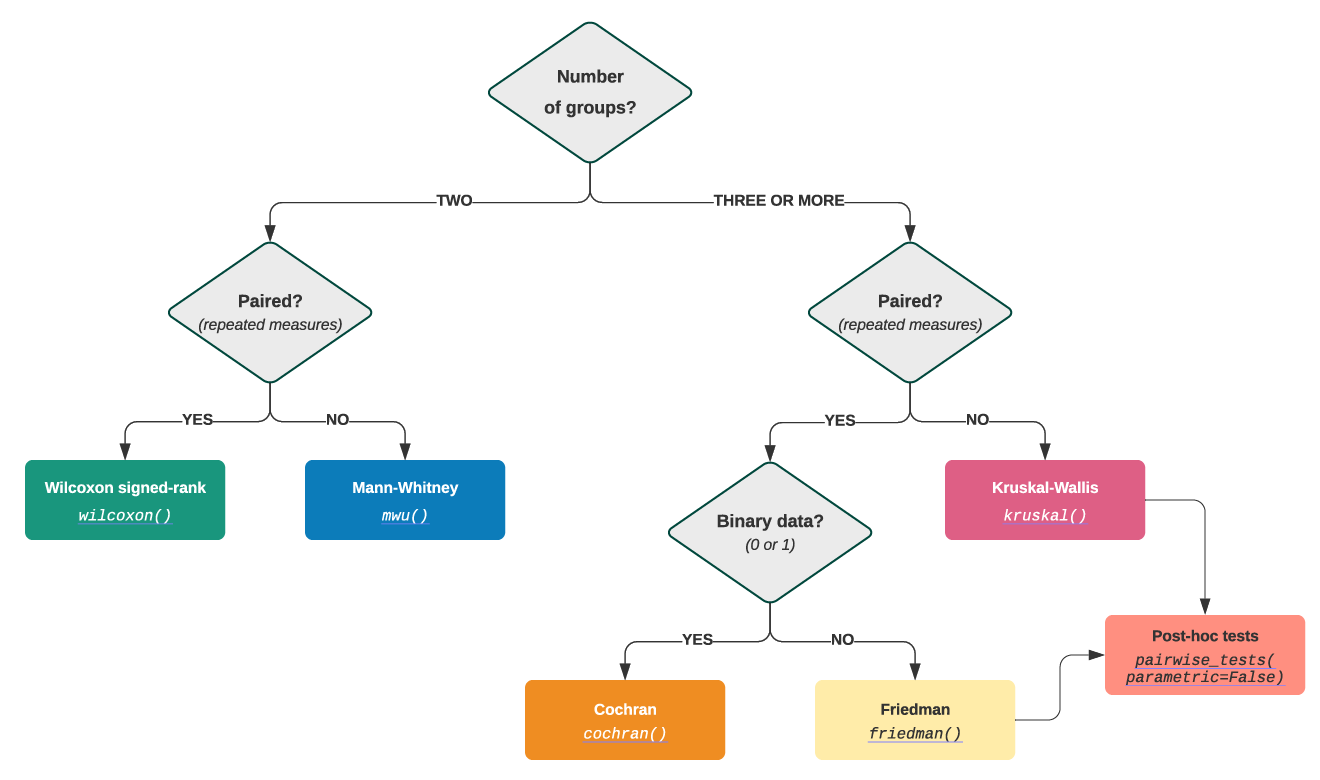

Vallat, R. (2018). Pingouin: statistics in Python. Journal of Open Source Software, 3(31), 1026

- https://pingouin-stats.org/build/html/index.html
- https://doi.org/10.21105/joss.01026

In [1]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [2]:
# Path to the file to be imported
path = "../Modelab-Python/data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
co2_data = import_csv(path)

## Kruskal-Wallis H-test for independent samples

In [50]:
from scipy.stats import kruskal

def kruskal_wallis_test(*groups, alpha=0.05):
    """
    Performs the Kruskal-Wallis H-test for independent samples.
    Accepts multiple groups as arguments.
    Prints the H statistic, p-value, and interpretation.
    """
    result = kruskal(*groups)
    
    print(f"H statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    
    if result.pvalue < alpha:
        print("The difference between groups is statistically significant.")
    else:
        print("No statistically significant difference between groups.")



In [47]:
import scikit_posthocs as sp
# You need to install the scikit-posthocs package: conda install -c conda-forge scikit-posthocs

def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    """
    Runs Dunn's post-hoc test after Kruskal-Wallis.
    """
    result = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result)
    return result

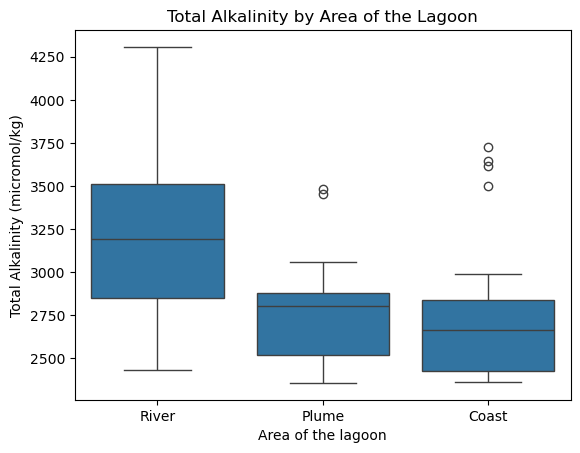

In [7]:
# Plot ta values for each area of the lagoon using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='ta_micromol_kg', data=co2_data)
plt.xlabel('Area of the lagoon')
plt.ylabel('Total Alkalinity (micromol/kg)')
plt.title('Total Alkalinity by Area of the Lagoon')
plt.show()

In [8]:
# Select the data for each area of the lagoon
ta_river = co2_data[co2_data['area'] == 'River']['ta_micromol_kg']
ta_plume = co2_data[co2_data['area'] == 'Plume']['ta_micromol_kg']
ta_coast= co2_data[co2_data['area'] == 'Coast']['ta_micromol_kg']

In [9]:
# Perform the Kruskal-Wallis test
kruskal_wallis_test(ta_river, ta_plume, ta_coast)

H statistic = 23.340675555846637
p-value = 8.543517259038796e-06
The difference between groups is statistically significant.


In [52]:
# Install the scikit-posthocs package before running the function.
!pip install scikit-posthocs

In [10]:
dunn_posthoc(co2_data, 'area', 'ta_micromol_kg')

          Coast     Plume     River
Coast  1.000000  1.000000  0.000016
Plume  1.000000  1.000000  0.000659
River  0.000016  0.000659  1.000000


,Coast,Plume,River
Coast,1.000000,1.000000,0.000016
Plume,1.000000,1.000000,0.000659
River,0.000016,0.000659,1.000000


## Exercise: Perform Kruskal-Wallis test and plot a box plot for DIC and temperature data.


In [48]:
# --- Extract groups by area for DIC ---
dic_river = co2_data[co2_data['area'] == 'River']['dic_micromol_kg']
dic_plume = co2_data[co2_data['area'] == 'Plume']['dic_micromol_kg']
dic_coast = co2_data[co2_data['area'] == 'Coast']['dic_micromol_kg']

In [49]:
# Perform the Kruskal-Wallis Test for DIC
kruskal_wallis_test(dic_river, dic_plume, dic_coast)

H statistic = 55.889669058187486
p-value = 7.306553461098262e-13
The difference between groups is statistically significant.


In [37]:
# Dunn Post Hoc Test for DIC
dunn_posthoc(co2_data, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00


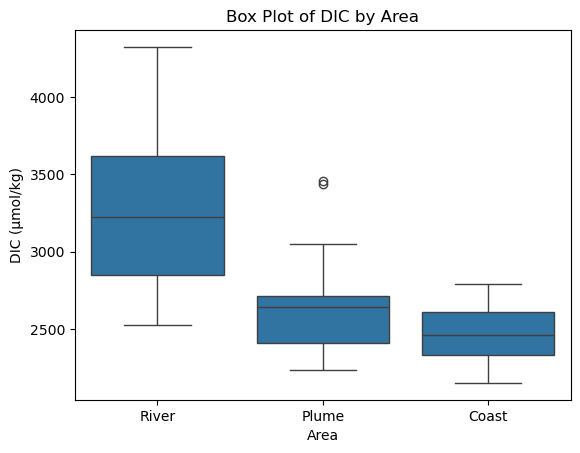

In [38]:
# --- Boxplot for DIC by Area ---
sns.boxplot(x='area', y='dic_micromol_kg', data=co2_data)
plt.title("Box Plot of DIC by Area")
plt.xlabel("Area")
plt.ylabel("DIC (μmol/kg)")
plt.show()

In [41]:
# --- Extract groups by area for Temperature ---
temp_river = co2_data[co2_data['area'] == 'River']['temp_c']
temp_plume = co2_data[co2_data['area'] == 'Plume']['temp_c']
temp_coast = co2_data[co2_data['area'] == 'Coast']['temp_c']

In [42]:
# Perform the Kruskal-Wallis Test for Temp
kruskal_wallis_test(temp_river, temp_plume, temp_coast)

H statistic = 7.6996429549091365
p-value = 0.021283535690208223
The difference between groups is statistically significant.


In [43]:
# Dunn Post Hoc Test for Temp
dunn_posthoc(co2_data, 'area', 'temp_c')

          Coast    Plume     River
Coast  1.000000  0.06468  0.038761
Plume  0.064680  1.00000  1.000000
River  0.038761  1.00000  1.000000


,Coast,Plume,River
Coast,1.000000,0.06468,0.038761
Plume,0.064680,1.00000,1.000000
River,0.038761,1.00000,1.000000


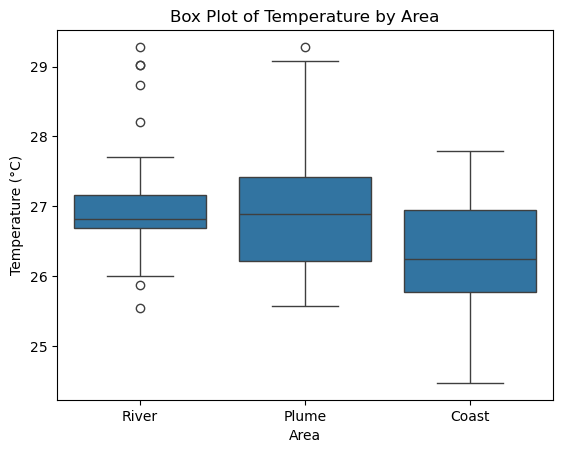

In [20]:
# --- Boxplot for Temperature by Area ---
sns.boxplot(x='area', y='temp_c', data=co2_data)
plt.title("Box Plot of Temperature by Area")
plt.xlabel("Area")
plt.ylabel("Temperature (°C)")
plt.show()